In [287]:
import os
os.system("adb exec-out screencap -p > screen.png")

0

In [246]:
from PIL import Image
import pyautogui as pg
from time import sleep
from pytesseract import image_to_string

In [314]:
i=Image.open('screen.png')
ii=i
m1=Image.open("minus1.png")
p1=Image.open("plus1.png")
p2=Image.open("plus2.png")
m2=Image.open("minus2.png")

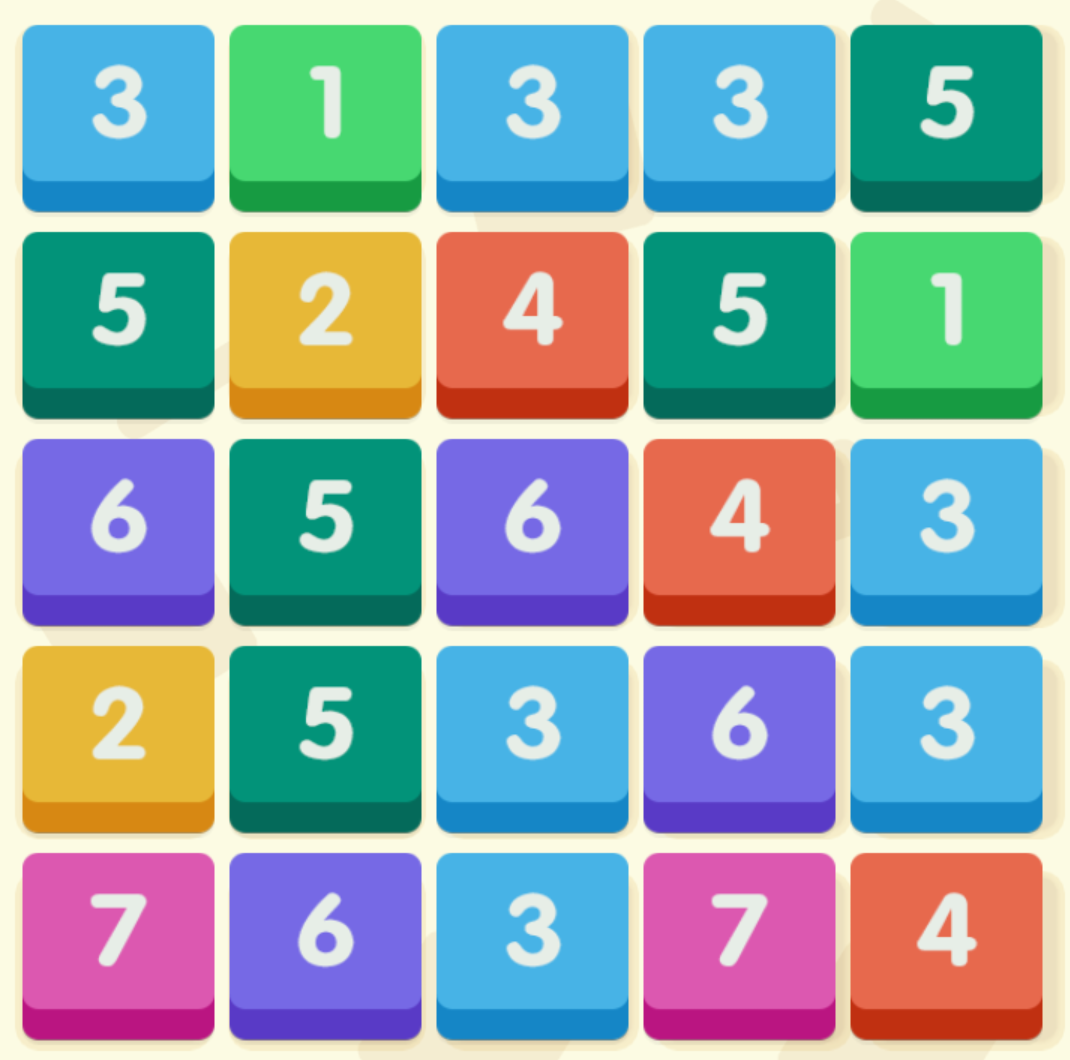

In [315]:
width, height = i.size
frame = ii.crop(((0,650,width-10,height-450)))
frame

In [231]:
# img = Image.open('mB96s.png')
def converttotext(img):
    thresh = 200
    fn = lambda x : 255 if x > thresh else 0
    r = img.convert('L').point(fn, mode='1')
    # r.save('foo.png')
    r.save("black.png")
    t=os.popen("gocr 0-9 black.png").read()[0]
    try:
        return int(t)
    except:
        return 1
    

In [311]:
def findthematrix():
    x1=40
    y1=40
    x2=210
    y2=210
    s=""
#     mat=[[0]*5]*5
    for i in range(5):
        for j in range(5):
            z=frame.crop(((x1+j*205,y1+i*210,x1+j*205+160,y1+160+i*210)))
#             print(i,j)
#             z.show()
#             sleep(2)
            s+=str(converttotext(z))+ " "
    return s


In [389]:
def nextmove():
    width, height = ii.size
    f = ii.crop(((669,400,width-350,height-1650)))
    res=1
    a=0
    if(cmp(f,p1)>a):
        a=cmp(f,p1)
        res=1
    if(cmp(f,p2)>a):
        a=cmp(f,p2)
        res=2
    if(cmp(f,m1)>a):
        a=cmp(f,m1)
        res=-1
    if(cmp(f,m2)>a):
        a=cmp(f,m2)
        res=-2
    return res

In [293]:
def createinput():
    s=findthematrix()
    s+=" "+str(nextmove())
    f=open("/home/addy/Desktop/bots/input.txt","w")
    f.write(s)

In [393]:
def bestmove():
#     createinput()
    s=os.popen("./a.out").read()
    x=int(s[0])
    y=int(s[2])
    print(x,y)
    pg.click(pos[x*5+y])
    